<a name="0"></a> 

# Image Segmentation 

The data for this task comes from Kaggle's Data Science Bowl from 2018 and concists of medical images and corresponding segmentation masks. The purpose of the competition is to build a model that can automatically segment the nuclei out of the images with high performance. When models are fitted in an optimal manner and can make unbiased predictions, this can greatly speed up research for a multitude of diseases by automating nuclei detection. This is important because according to the competition description, a cell's nuclei is the starting point for most analyses. 

* [Dataset/Competition Link](https://www.kaggle.com/c/data-science-bowl-2018)

---

## Models 

* **K-Means Clustering** 
* **U-Net Fully Convolutional Neural Network** 

---

## Notebook Outline 

* [1. Load and Plot Data](#1) 
* [2. K-Means Clustering](#2) 
* [3. U-Net Fully Convolutional Network](#3) 
* [4. Summary and Conclusion](#4) 

--- 



In [1]:
import os 
os.chdir('../') 

from dspML import data, preprocessing 
from dspML.plot import Nuclei, plot_observed_segmentations 
from dspML.models.image import unet, kmeans as km 
from dspML.evaluation import SegmentationMetrics 

<a name="1"></a> 

# 1. Load and Plot Data 

[Outline](#0) 



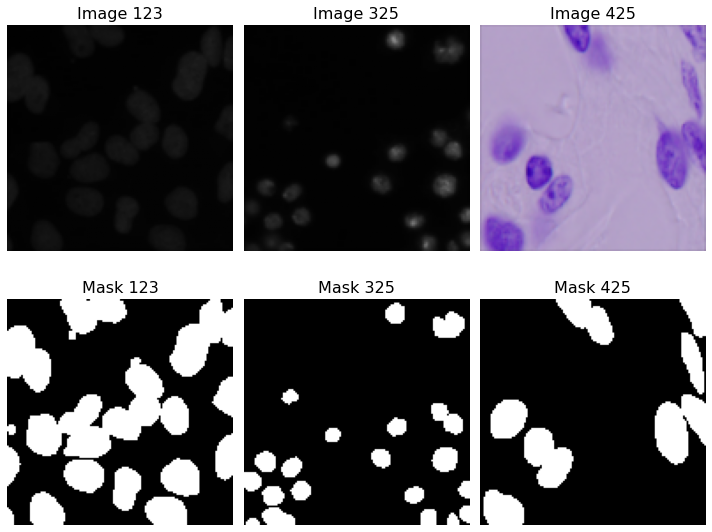

In [2]:
# load data 
X, y = data.Nuclei.train() 
test = data.Nuclei.test() 

# plot observations 
plot_observed_segmentations(X, y) 

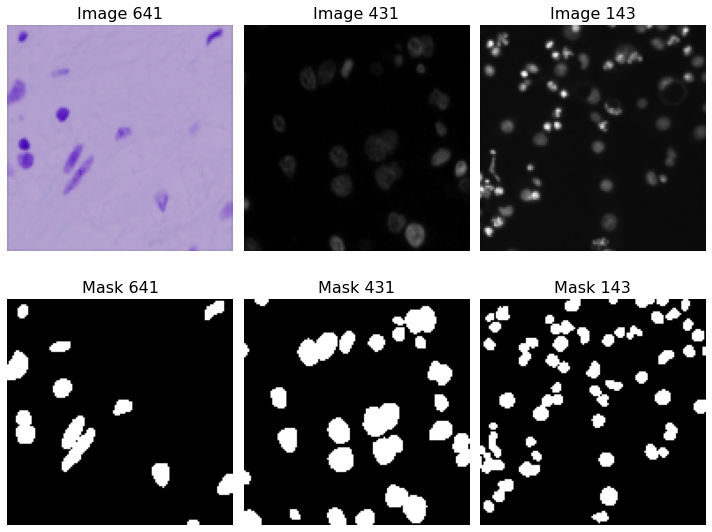

In [3]:
# plot observations 
plot_observed_segmentations(X, y) 

---

## Split Data 

The data are split such that 90% is used for train data and the remaining 10% is for test data. There are 670 observations total, 603 for train data, and 67 for test data. 

In [4]:
# split data 
X_train, X_test, y_train, y_test = preprocessing.split_data(X, y, test_size=0.1) 

# for plotting and evaluation 
plot = Nuclei(X_train, y_train, X_test, y_test, test) 
metrics = SegmentationMetrics(X_train, y_train, X_test, y_test) 

print('Training Data Dimensions:') 
print('X_train = ', X_train.shape, '\ny_train = ', y_train.shape) 
print('\nTesting Data Dimensions:') 
print('X_test = ', X_test.shape, '\ny_test = ', y_test.shape) 

Training Data Dimensions:
X_train =  (603, 128, 128, 3) 
y_train =  (603, 128, 128, 1)

Testing Data Dimensions:
X_test =  (67, 128, 128, 3) 
y_test =  (67, 128, 128, 1)


---

<a name="2"></a> 

# 2. K-Means Clustering Segmentation 

[Outline](#0) | [Section 3 Outline](#3) | [Summary and Conclusion](#4) 

---

## Section Outline 

* [Plot Train Predictions](#2-1) 
* [Predict and Evaluate Test Clusters](#2-2) 
* [Plot Test Predictions](#2-3) 

---

## Predict and Evaluate Train Clusters 

K-Means clustering is an unsupervised learning method that clusters data points together based on distance. For the task of segmenting nuclei out of medical images, $k=2$ clusters were selected hoping that there will be a cluster for nuclei regions in the images, and another cluster for non-nuclei regions. Once the model is fit, no predictions need to be made since the clusters formed from fitting the model are the predictions for K-Means. 

The DICE coefficient and soft DICE loss will be considered for evaluating both segmentation models since they are generally robust to a high degree of class imbalance since the computation treats every pixel in the prediction and the segmentation mask equally. The DICE coefficient is defined as 

$$
DICE(y, \hat{y}) = \frac{2 \sum_{n}{ y_{i} \hat{y}_{i} } + \epsilon}{\sum_{n}{y_i} + \sum_{n}{\hat{y}_i} + \epsilon}
$$

The soft DICE loss function is similar to the DICE coefficient, defined as 

$$
L(y, \hat{y}) = 1 - \frac{2 \sum_{n}{ y_{i} \hat{y}_{i}}}{ \sum_{n}{y_{i}^{2}} + \sum_{n}{\hat{y}_{i}^{2}} + \epsilon}
$$

In [5]:
# predict train masks 
p_train = km.predict_clusters(X_train) 

# evaluate predictions 
metrics.DiceCoefficient(p_train) 
metrics.softDice_loss(p_train) 

Train Data Dice Coefficient = 0.1892147660255432
Train Soft Dice Loss = 0.7332109212875366


---

<a name="2-1"></a> 

## Plot Train Predictions 

[Section Outline](#2) 

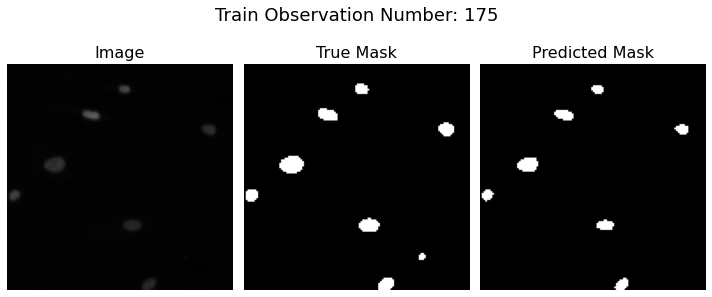

In [6]:
# plot predictions 
plot.predicted_mask(p_train) 

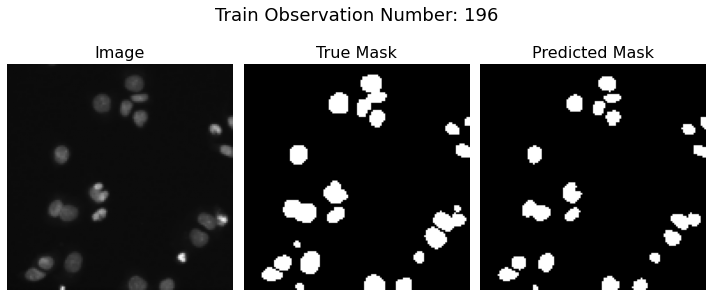

In [7]:
# plot predictions 
plot.predicted_mask(p_train) 

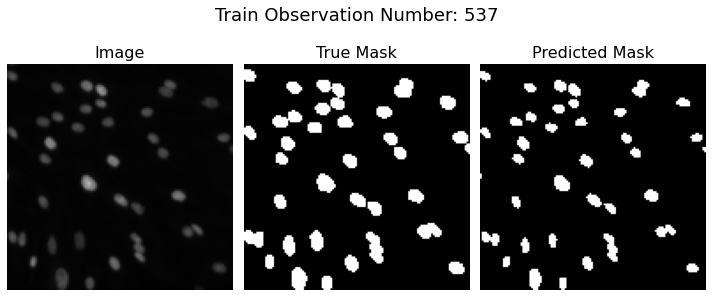

In [8]:
# plot predictions 
plot.predicted_mask(p_train) 

---

<a name="2-2"></a> 

## Predict and Evaluate Test Clusters 

[Section Outline](#2) 

In [9]:
# predict test masks 
p_test = km.predict_clusters(X_test) 

# evaluate predictions 
metrics.DiceCoefficient(p_test) 
metrics.softDice_loss(p_test) 

Test Data Dice Coefficient = 0.2008255422115326
Test Soft Dice Loss = 0.7248151302337646


---

<a name="2-3"></a> 

## Plot Test Predictions 

[Section Outline](#2) 

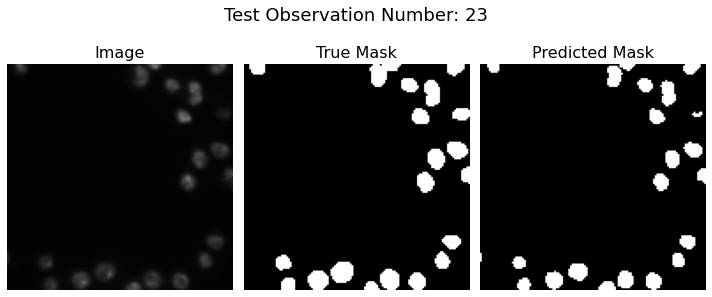

In [10]:
# plot predictions 
plot.predicted_mask(p_test) 

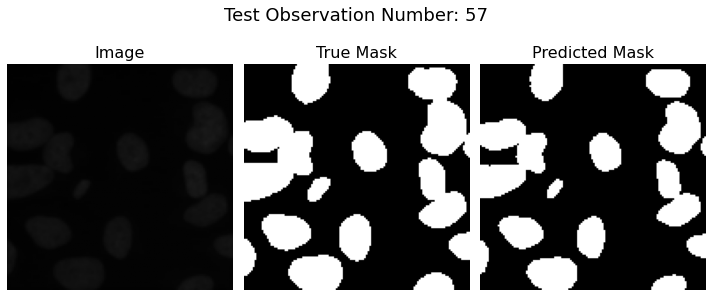

In [11]:
# plot predictions 
plot.predicted_mask(p_test) 

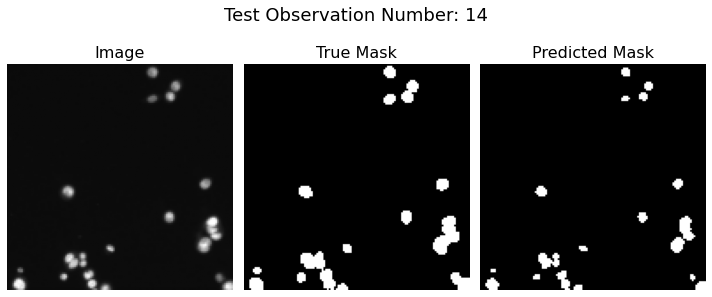

In [12]:
# plot predictions 
plot.predicted_mask(p_test) 

---

<a name="3"></a> 

# 3. U-Net Fully Convolutional Network 

[Outline](#0) | [Section 2 Outline](#2) | [Summary and Conclusion](#4) 

---

## Section Outline 

* [Predict and Evaluate Train Masks](#3-1) 
* [Plot Train Predictions](#3-2) 
* [Predict and Evaluate Test Predictions](#3-3)
* [Plot Test Predictions](#3-4)
* [Model Deployment](#3-5)

---

## Load Model 

U-Net has a complex architecture with many layers so a pretrained model will be used in this notebook. Fitting was done on Google Colab since it offers a free GPU which overall saved a significant amount of time. 

The model was fit for 500 epochs using a batch size of 16 with early stopping to stop training after 15 epochs if there is no improvement in validation loss. From the train data, 10% of observations are set aside for validation data during the training process. The model was fit for a total of 98 epochs before the process was stopped. 

In [13]:
# load model 
model = unet.load_uNet() 
model.summary() 

Model: "UNet_Nuclei_Segmentation_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 36928       dropout[0][0]                    
_____________________________________________________________________

---

The model has a total of 31,031,745 trainable parameters. 

---

<a name="3-1"></a> 

## Predict and Evaluate Train Masks 

[Section Outline](#3) 

In [14]:
# predict train masks 
p_train = unet.predict_segmentation_masks(model, X_train) 

# evaluate model 
metrics.DiceCoefficient(p_train) 
metrics.softDice_loss(p_train) 

Train Data Dice Coefficient = 0.9409178495407104
Train Soft Dice Loss = 0.05908215045928955


---

<a name="3-2"></a> 

## Plot Train Predictions 

[Section Outline](#3) 

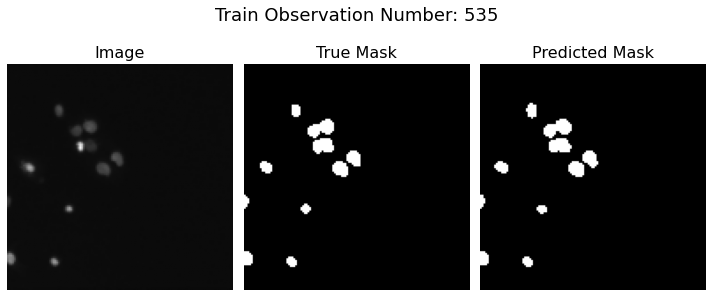

In [15]:
# plot predictions 
plot.predicted_mask(p_train) 

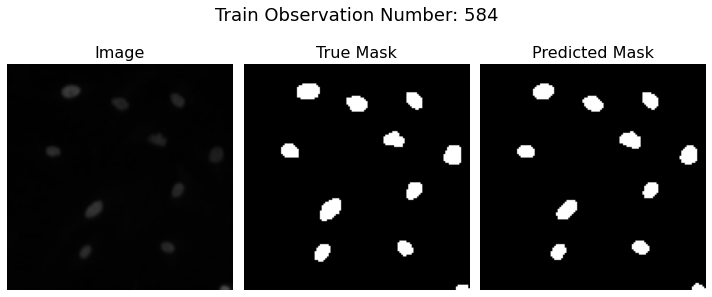

In [16]:
# plot predictions 
plot.predicted_mask(p_train) 

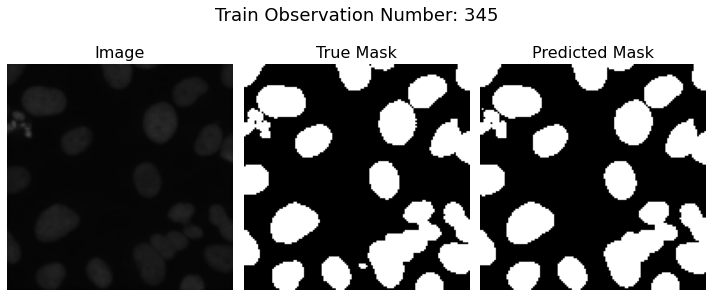

In [17]:
# plot predictions 
plot.predicted_mask(p_train) 

---

<a name="3-3"></a> 

## Predict and Evaluate Test Predictions 

[Section Outline](#3) 

In [18]:
# predict test masks 
p_test = unet.predict_segmentation_masks(model, X_test) 

# evaluate model 
metrics.DiceCoefficient(p_test) 
metrics.softDice_loss(p_test) 

Test Data Dice Coefficient = 0.9312377572059631
Test Soft Dice Loss = 0.06876224279403687


---

<a name="3-4"></a> 

## Plot Test Predictions 

[Section Outline](#3) 

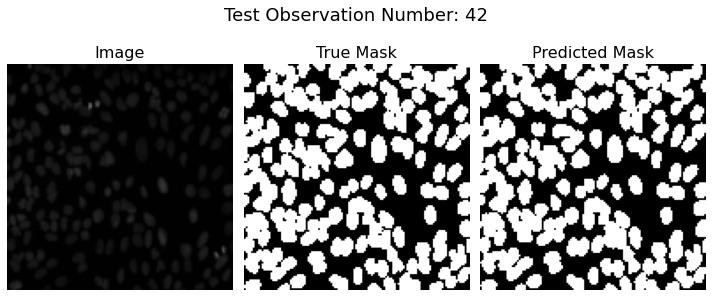

In [19]:
# plot predictions 
plot.predicted_mask(p_test) 

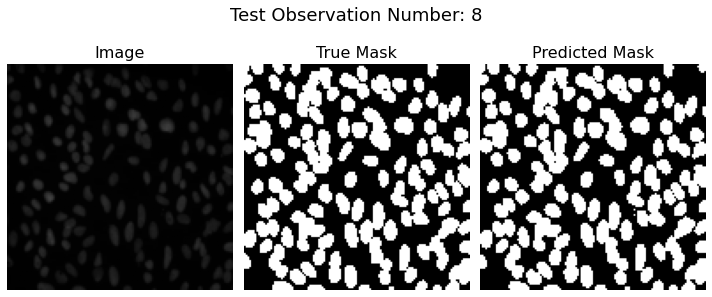

In [20]:
# plot predictions 
plot.predicted_mask(p_test) 

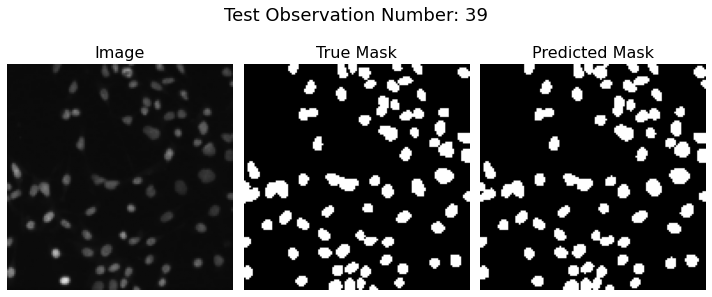

In [21]:
# plot predictions 
plot.predicted_mask(p_test) 

---

<a name="3-5"></a> 

## Model Deployment 

[Section Outline](#3) 

---

These images do not have a segmentation mask so the U-Net will make the segmentation predictions. 

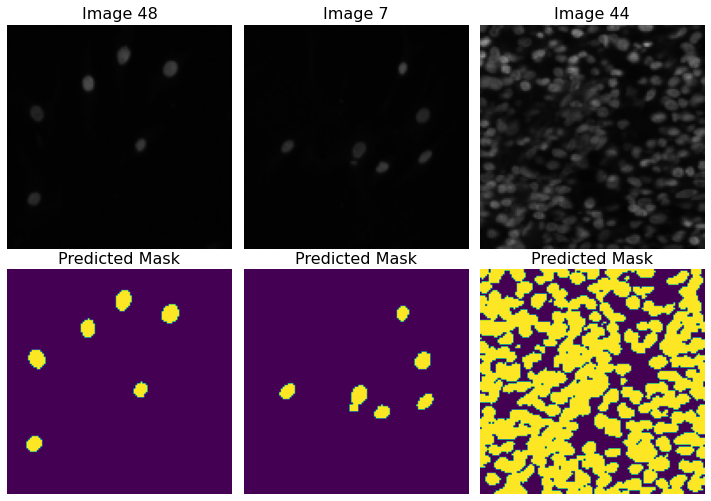

In [22]:
# predict segmentation masks 
masks = unet.predict_segmentation_masks(model, test) 

# plot predicted masks 
plot.new_random_segmentations(masks) 

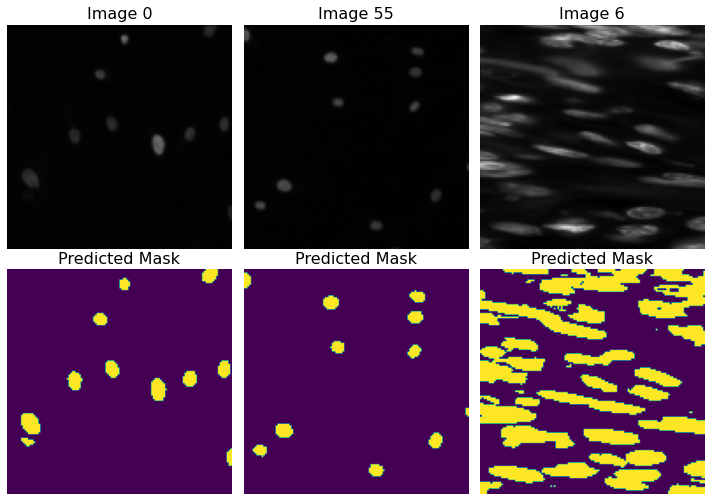

In [23]:
# plot predicted masks 
plot.new_random_segmentations(masks) 

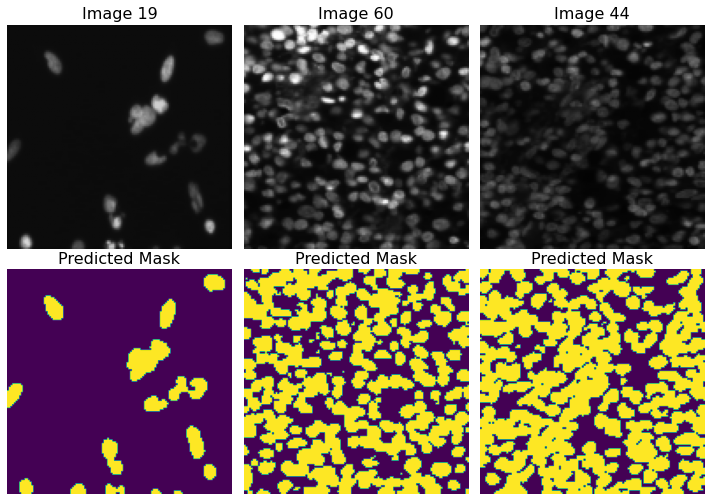

In [24]:
# plot predicted masks 
plot.new_random_segmentations(masks) 

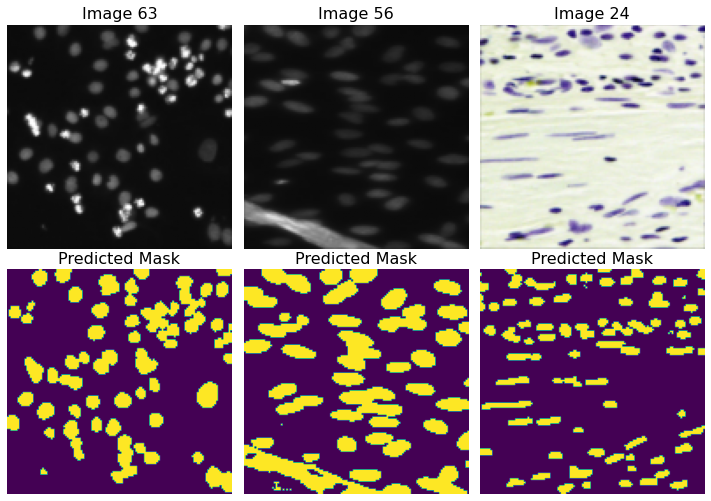

In [25]:
# plot predicted masks 
plot.new_random_segmentations(masks) 

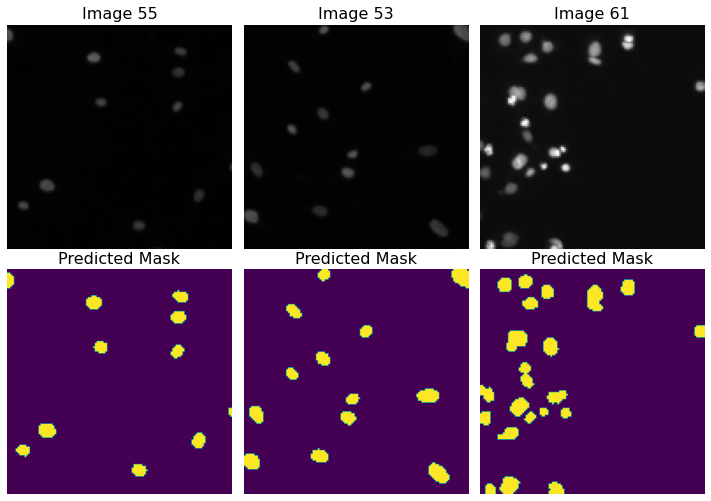

In [26]:
# plot predicted masks 
plot.new_random_segmentations(masks) 

---

<a name="4"></a> 

# 4. Summary and Conclusion 

[Outline](#0) | [Section 2 Outline](#2) | [Section 3 Outline](#3) 

---

The performance metrics considered for image segmentation are the DICE similarity coefficient and the soft DICE loss. The metrics for both models for train and test data are displayed in the table below. 

| Model   | Data  | DICE Coefficient  | Soft DICE Loss | 
| :---:   | :---: | :---:             | :---:          | 
| K-Means | Train | 0.1892            | 0.7332         | 
|         | Test  | 0.2008            | 0.7248         | 
| U-Net   | Train | 0.9409            | 0.0591         | 
|         | Test  | 0.9312            | 0.0688         | 

The performance metrics suggest that both models had consistent performance for train and test data. K-Means is an unsupervised algorithm while U-Net is supervised. Metrics suggest that U-Net performed exceptionally well while K-Means did not perform so well. 